In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor

import warnings
warnings.filterwarnings('ignore')

 # Now let’s use the panda’s data frame to load the dataset and look at the first five rows of it.

In [4]:
df = pd.read_csv('tips.csv')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
df.shape

(244, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


# From the above, we can see that the dataset contains 2 columns with float values 4 with categorical values and the rest contains integer values.

In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
total_bill,244.0,19.785943,8.902412,3.07,13.3475,17.795,24.1275,50.81
tip,244.0,2.998279,1.383638,1.00,2.0000,2.900,3.5625,10.00
size,244.0,2.569672,0.951100,1.00,2.0000,2.000,3.0000,6.00


In [13]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

# So, there are no null values in the given dataset.

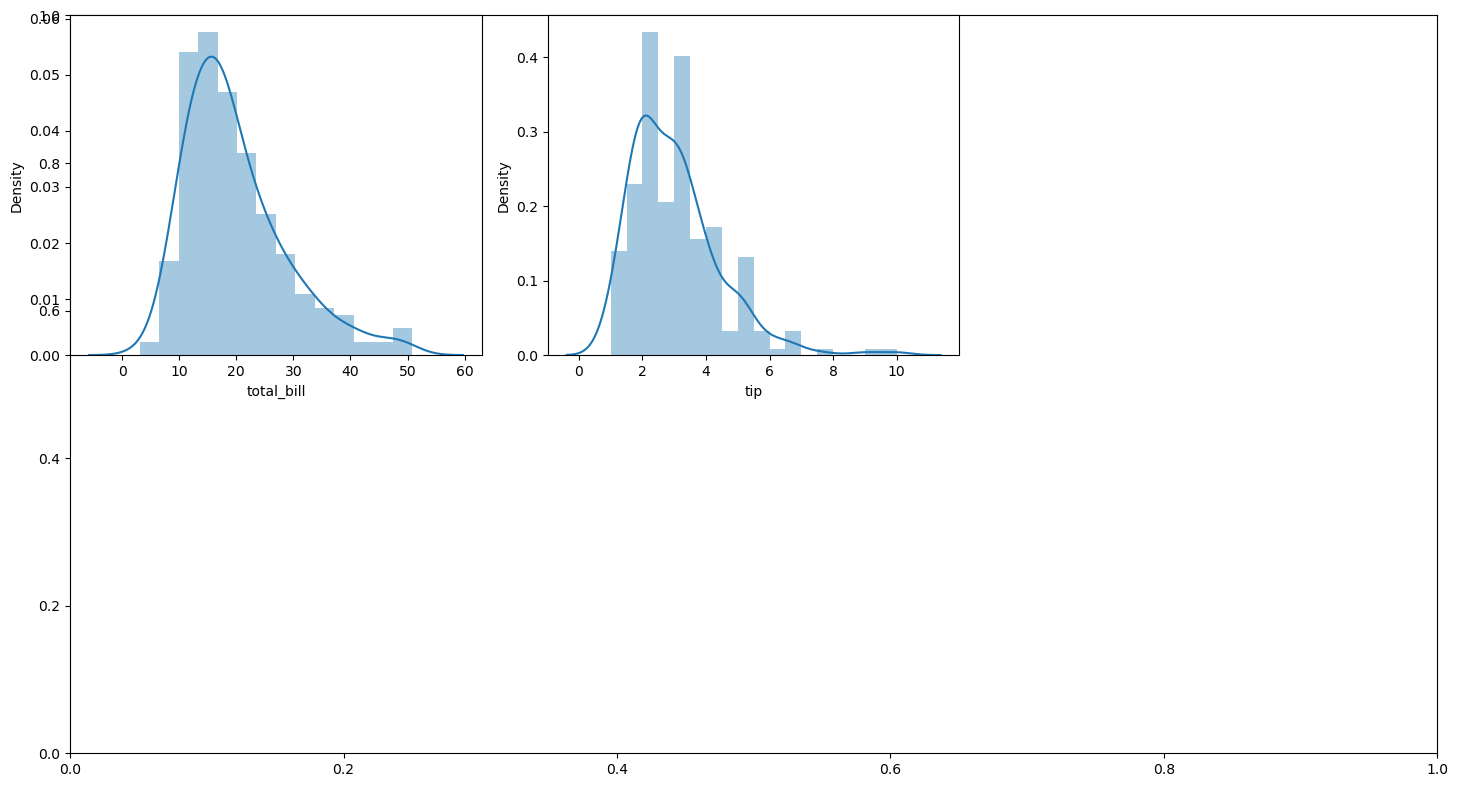

In [16]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
  plt.subplot(2,3, i + 1)
  sb.distplot(df[col])
plt.tight_layout()
plt.show()

# From the above plots, we can conclude that the data distribution is a little bit positively skewed. This is observed generally because maximum people spend in a certain range but some do such heavy expenditure that the distribution becomes positively skewed.

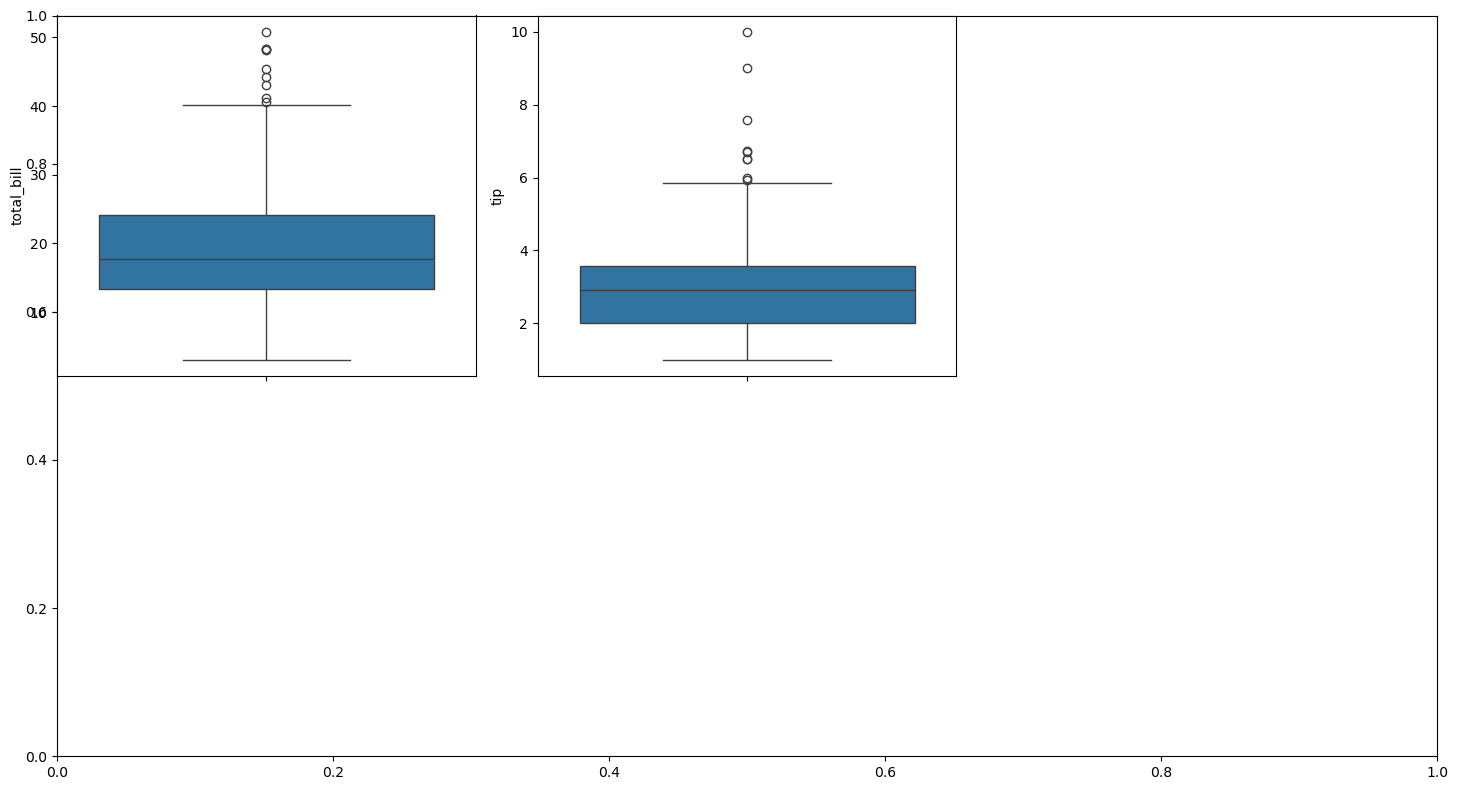

In [19]:
plt.subplots(figsize=(15,8))

for i, col in enumerate(['total_bill', 'tip']):
  plt.subplot(2,3, i + 1)
  sb.boxplot(df[col])
plt.tight_layout()
plt.show()

# From the above boxplots, we can say that there are outliers in the dataset.

In [22]:
df.shape, df[(df['total_bill']<45) & (df['tip']<7)].shape

((244, 7), (238, 7))

# We will have to just lose 6 data points in order to get rid of most of the outliers

In [25]:
df = df[(df['total_bill']<45) & (df['tip']<7)]

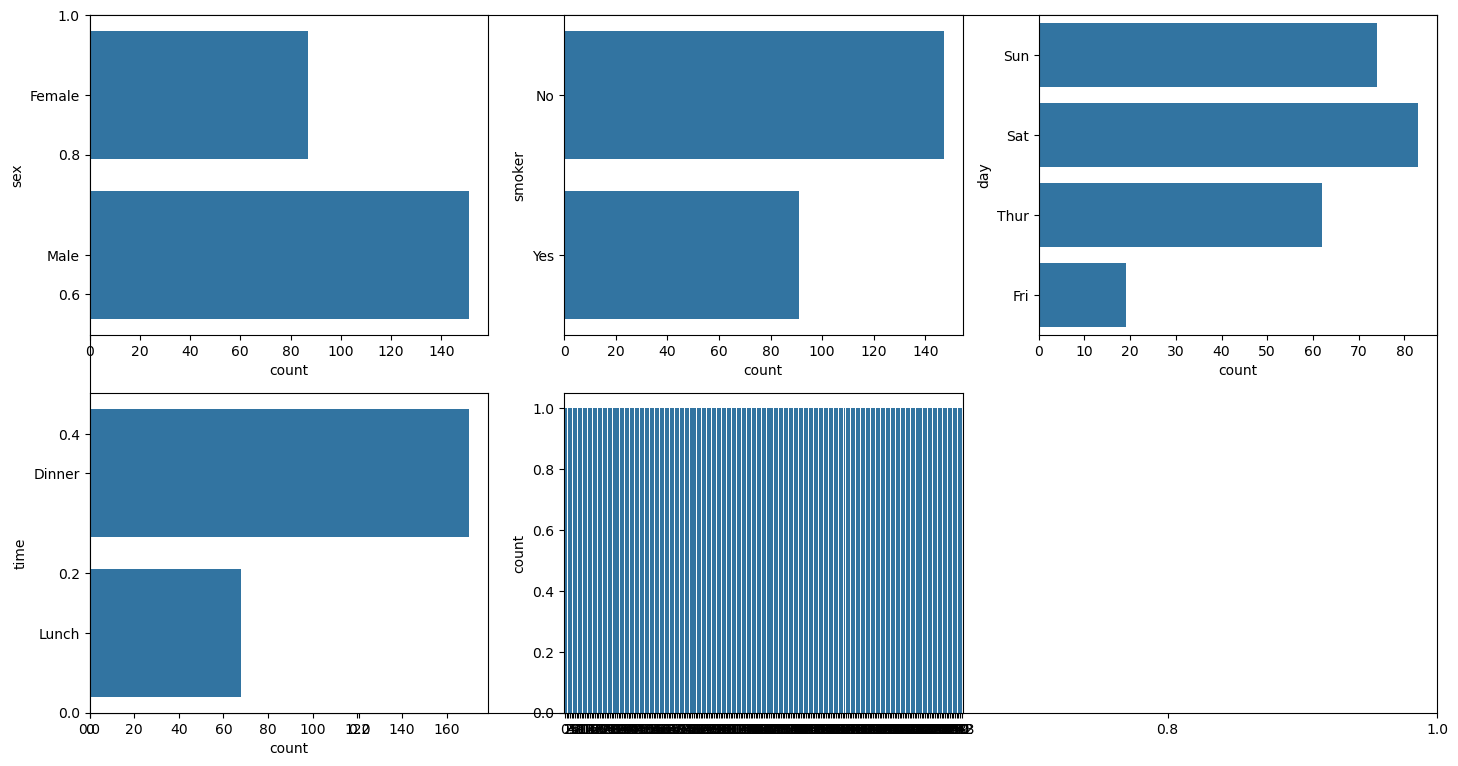

In [27]:
feat = df.loc[:,'sex':'size'].columns

plt.subplots(figsize=(15,8))
for i, col in enumerate(feat):
  plt.subplot(2,3, i + 1)
  sb.countplot(df[col])
plt.tight_layout()
plt.show()

# Footfall on weekends is more than that on weekdays# 
People usually prefer dinner outside as compared to lunch..

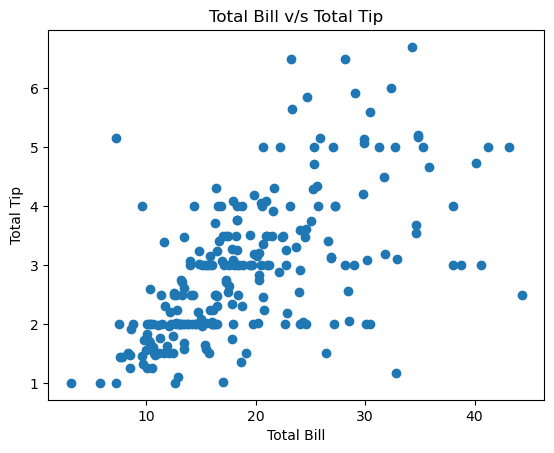

In [32]:
plt.scatter(df['total_bill'], df['tip'])
plt.title('Total Bill v/s Total Tip')
plt.xlabel('Total Bill')
plt.ylabel('Total Tip')
plt.show()

In [34]:
df.groupby(['size']).mean(numeric_only=True)

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,21.899722,3.206667
4,27.137647,3.814706
5,30.068000,4.028000
6,30.383333,5.300000


# observation that we can derive from the above-grouped table that the tip given to the waiter is directly proportional to the number of people who have arrived to dine in.

In [37]:
df.groupby(['time']).mean(numeric_only=True)

,total_bill,tip,size
time,,,
Dinner,19.882059,2.966235,2.582353
Lunch,17.168676,2.728088,2.411765


# People who come at dinner time tend to pay more tips as compared to those who came for lunch.

In [40]:
df.groupby(['day']).mean(numeric_only=True)

,total_bill,tip,size
day,,,
Fri,17.151579,2.734737,2.105263
Sat,19.175542,2.736024,2.457831
Sun,20.724865,3.228243,2.797297
Thur,17.682742,2.771452,2.451613


# the tip given on weekends is generally higher than that compared that given on weekdays.

In [43]:
le = LabelEncoder()

for col in df.columns:
  if df[col].dtype == object:
    df[col] = le.fit_transform(df[col])

df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


# all the columns have been converted to numerical form

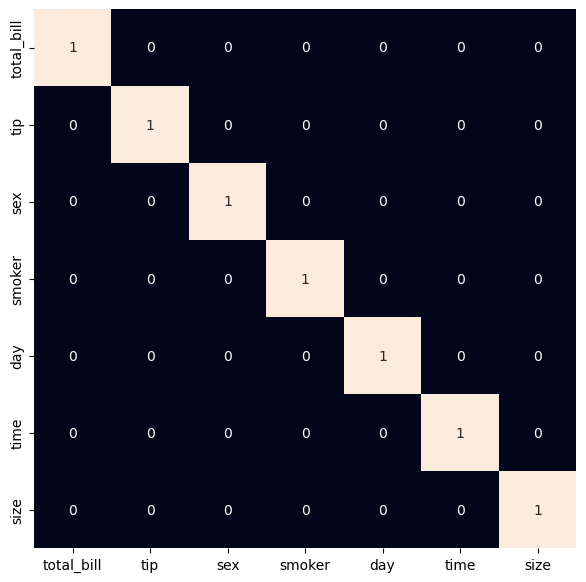

In [46]:
plt.figure(figsize=(7,7))
sb.heatmap(df.corr() > 0.7, annot = True, cbar = False)
plt.show()

# From the above heatmap, it is certain that there are no highly correlated features in it.

In [49]:
features = df.drop('tip', axis=1)
target = df['tip']

X_train, X_val, Y_train, Y_val = train_test_split(features, target, test_size=0.2, random_state=22)
X_train.shape, X_val.shape

((190, 6), (48, 6))

In [51]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [53]:
models = [LinearRegression(), XGBRegressor(), RandomForestRegressor(), AdaBoostRegressor()]

for i in range(4):
  models[i].fit(X_train, Y_train)

  print(f'{models[i]} : ')
  pred_train = models[i].predict(X_train)
  print('Training Accuracy : ', mae(Y_train, pred_train))

  pred_val = models[i].predict(X_val)
  print('Validation Accuracy : ', mae(Y_val, pred_val))
  print()

LinearRegression() : 
Training Accuracy :  0.6866406322422778
Validation Accuracy :  0.7903774704017296

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...) : 
Training Accuracy :  0.02728007923929315
Validation Accuracy :  0.7682166453202566

RandomForestRegressor() : 
Training Accuracy :  0.28430578947

# Out of all the models RandomForestModel is giving the least value for the mean absolute error this means predictions made by this model are close to the real values as compared to the other model.